# 线性回归模型预测房价

## 任务目标：基于us_housing.csv数据，建立线性回归模型，预测合理房价

1.以面积为输入变量，建立单因子模型，评估模型表现，可视化线性评估模型结果

2.以income, housing age, number of rooms, population, area 为输入变量，建立多因子模型，评估模型表现

3.预测income = 65000，housing age = 5, Number of rooms = 5, population = 30000, size = 200的合理房价

In [1]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
filename = 'USA_Housing.csv'
df = pd.read_csv(filename, encoding='utf-8')
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [3]:
# 将科学记数法转换为普通数字
clean_df = df.map(lambda x: '{:.5f}'.format(x) if isinstance(x, float) else x)
clean_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.68286,7.00919,4.09000,23086.80050,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.00290,6.73082,3.09000,40173.07217,1505890.91485,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.86589,8.51273,5.13000,36882.15940,1058987.98788,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.18824,5.58673,3.26000,34310.24283,1260616.80663,USS Barnett\nFPO AP 44820
4,59982.19723,5.04055,7.83939,4.23000,26354.10947,630943.48934,USNS Raymond\nFPO AE 09386


Text(0, 0.5, 'Price')

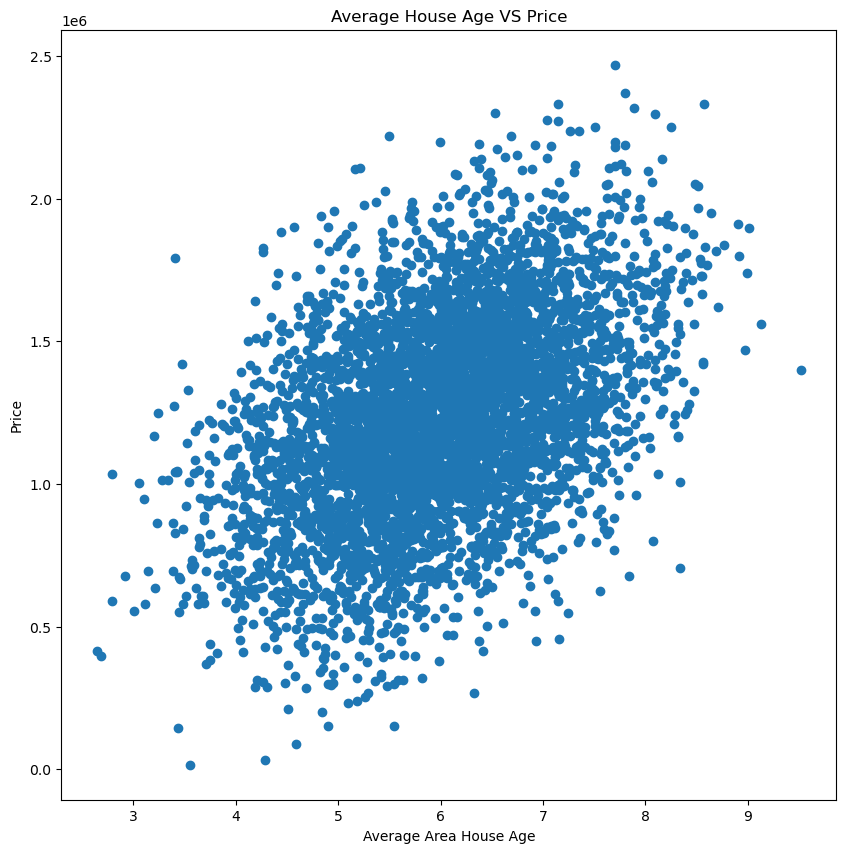

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['Avg. Area House Age'], df['Price'])
plt.title("Average House Age VS Price")
plt.xlabel("Average Area House Age")
plt.ylabel("Price")

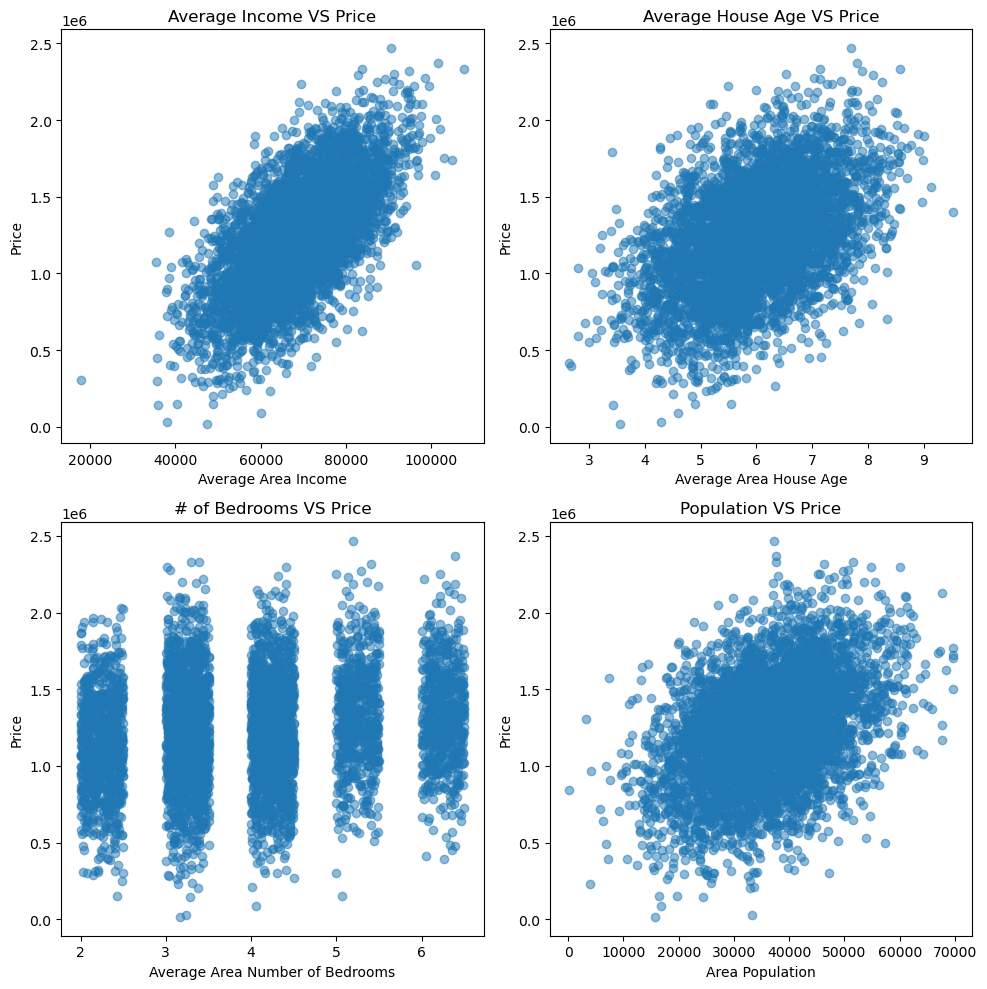

In [4]:
# Visualize the relationship between each variable and price

# Create a figure and set the size
fig = plt.figure(figsize=(10, 10))

# Plot Average Income VS Price
fig1 = plt.subplot(221)
plt.scatter(df['Avg. Area Income'], df['Price'])
plt.title("Average Income VS Price")
plt.xlabel("Average Area Income")
plt.ylabel("Price")

# Plot Average House Age VS Price
fig2 = plt.subplot(222)
plt.scatter(df['Avg. Area House Age'], df['Price'])
plt.title("Average House Age VS Price")
plt.xlabel("Average Area House Age")
plt.ylabel("Price")

# Plot Number of Bedrooms VS Price
fig3 = plt.subplot(223)
plt.scatter(df['Avg. Area Number of Bedrooms'], df['Price'])
plt.title("# of Bedrooms VS Price")
plt.xlabel("Average Area Number of Bedrooms")
plt.ylabel("Price")

# Plot Population VS Price
fig4 = plt.subplot(224)
plt.scatter(df['Area Population'], df['Price'])
plt.title("Population VS Price")
plt.xlabel("Area Population")
plt.ylabel("Price")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Visualize the relationship between each variable and price

# Create a figure and set the size
fig = plt.figure(figsize=(10, 10))

# Plot Average Income VS Price
fig1 = plt.subplot(221)
plt.scatter(clean_df['Avg. Area Income'], clean_df['Price'], alpha=0.5)
plt.title("Average Income VS Price")
plt.xlabel("Average Area Income")
plt.ylabel("Price")

# Plot Average House Age VS Price
fig2 = plt.subplot(222)
plt.scatter(clean_df['Avg. Area House Age'], clean_df['Price'], alpha=0.5)
plt.title("Average House Age VS Price")
plt.xlabel("Average Area House Age")
plt.ylabel("Price")

# Plot Number of Bedrooms VS Price
fig3 = plt.subplot(223)
plt.scatter(clean_df['Avg. Area Number of Bedrooms'], clean_df['Price'], alpha=0.5)
plt.title("# of Bedrooms VS Price")
plt.xlabel("Average Area Number of Bedrooms")
plt.ylabel("Price")

# Plot Population VS Price
fig4 = plt.subplot(224)
plt.scatter(clean_df['Area Population'], clean_df['Price'], alpha=0.5)
plt.title("Population VS Price")
plt.xlabel("Area Population")
plt.ylabel("Price")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# 建立单因子模型

In [17]:
x = clean_df["Avg. Area Income"]
y = clean_df["Price"]
y.head()

0    1059033.55787
1    1505890.91485
2    1058987.98788
3    1260616.80663
4     630943.48934
Name: Price, dtype: object

In [27]:
# Transfer into array
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
# x.shape
y.shape

(5000, 1)

In [19]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

# Train the model
lr1.fit(x, y)

LinearRegression()

In [20]:
# Calculate the price vs Income
y_predict = lr1.predict(x)
print(y_predict)

[[1464424.9503176 ]
 [1458133.789241  ]
 [1077429.52286546]
 ...
 [1122016.75902877]
 [1219741.59376067]
 [1166948.95591981]]


In [21]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(y, y_predict)
# R2 Score 越接近1越好
r2_1 = r2_score(y, y_predict)
print(mse_1, r2_1)

73645940735.57074 0.4092593070308147


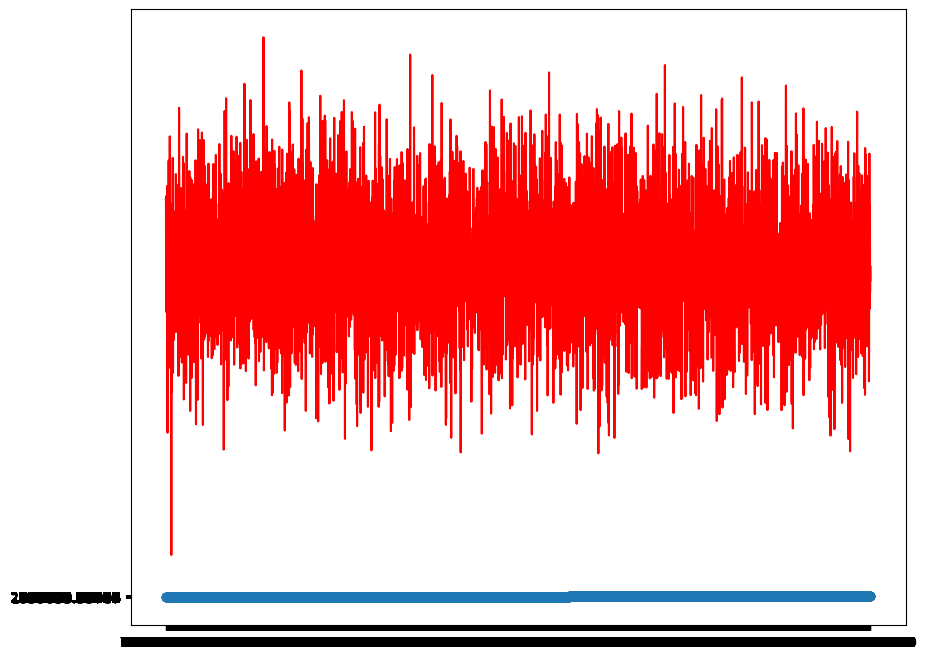

In [29]:
# Visualize the prediction results
fig6 = plt.figure(figsize=(10, 8))
plt.scatter(x.flatten(), y.flatten(), label='Actual data')
plt.plot(x.flatten(), y_predict.flatten(), color="red", label='Predicted data')
plt.show()
